In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import shapiro
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest
# Load the Excel file
df = pd.read_excel("apples_jalandhar.xlsx")


In [3]:
#OBJECTIVE 1
# DATA CLEANING
# Clean and preprocess the dataset by handling missing values and formatting date and numerical columns.

In [4]:
# Overview of the dataset
df.info()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   State           1466 non-null   object        
 1   District        1466 non-null   object        
 2   Market          1466 non-null   object        
 3   Commodity       1466 non-null   object        
 4   Variety         1466 non-null   object        
 5   Grade           1466 non-null   object        
 6   Arrival_Date    1466 non-null   datetime64[ns]
 7   Min_Price       1466 non-null   int64         
 8   Max_Price       1466 non-null   int64         
 9   Modal_Price     1466 non-null   int64         
 10  Commodity_Code  1466 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 126.1+ KB


State             0
District          0
Market            0
Commodity         0
Variety           0
Grade             0
Arrival_Date      0
Min_Price         0
Max_Price         0
Modal_Price       0
Commodity_Code    0
dtype: int64

In [5]:
#CLEAN THE DATES
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], errors='coerce')


In [6]:
#CLEAN THE NUMERIC VALUES
df['Min_Price'] = pd.to_numeric(df['Min_Price'].astype(str).str.replace(",", ""), errors='coerce')
df['Max_Price'] = pd.to_numeric(df['Max_Price'].astype(str).str.replace(",", ""), errors='coerce')
df['Modal_Price'] = pd.to_numeric(df['Modal_Price'].astype(str).str.replace(",", ""), errors='coerce')

In [10]:


#fill missing values if there are (no missing values in my dataset)
df.ffill(inplace=True)



In [7]:
# OBJECTIVE 2
# Data Manipulation and Aggregation
# Perform data aggregation to analyze monthly and yearly trends in apple arrivals and prices.

In [8]:
#EXTRACTING YEAR AND MONTH FOR EASIER INSIGHTS
df['Year'] = df['Arrival_Date'].dt.year
df['Month'] = df['Arrival_Date'].dt.month

In [9]:
trends = df.groupby(['Year', 'Month']).agg({
    'Modal_Price': 'mean',     # Average modal price
    'Min_Price': 'mean',       #average min price
    'Max_Price': 'mean'        #average max price
}).reset_index()




In [10]:
#finding a price gap between the apples
trends['Price_Range'] = trends['Max_Price'] - trends['Min_Price']

In [11]:
#TO MAKE THE MONTHS READABLE AND DATA MORE EASIER, WE IMPORTED CALENDER AND ADDED READABLE MONTH NAMES FOR EASIER OUTLOOK

import calendar
trends['Month_Name'] = trends['Month'].apply(lambda x: calendar.month_name[x])


In [12]:
trends.head()


,Year,Month,Modal_Price,Min_Price,Max_Price,Price_Range,Month_Name
0,2020,4,4996.666667,4070.000000,7150.000000,3080.000000,April
1,2020,5,3725.000000,2895.000000,5850.000000,2955.000000,May
2,2020,6,2921.052632,2263.157895,4657.894737,2394.736842,June
3,2020,7,2895.833333,2062.500000,4645.833333,2583.333333,July
4,2020,8,2572.727273,1440.909091,4795.454545,3354.545455,August


In [13]:
#OBJECTIVE 3
# Data Visualization
# Visualize market trends using line plots, heatmaps, and box plots for better insights.


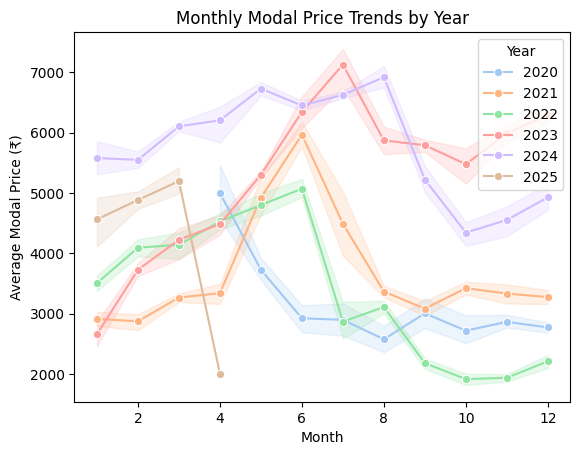

In [14]:
#LINE PLOT

sns.lineplot(data=df, x='Month', y='Modal_Price', hue='Year', marker='o', palette='pastel')

plt.title('Monthly Modal Price Trends by Year')
plt.xlabel('Month')
plt.ylabel('Average Modal Price (₹)')

plt.show()


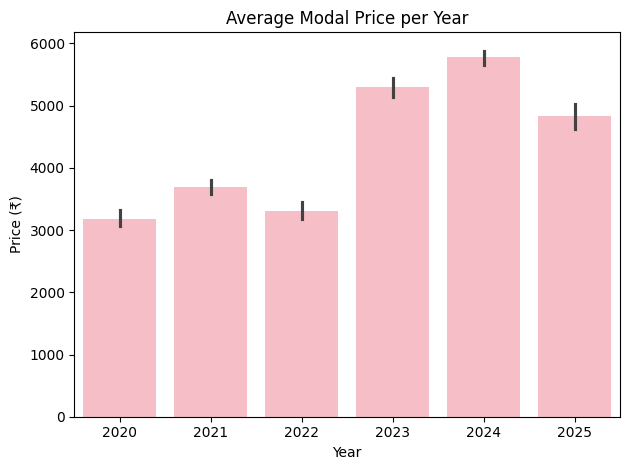

In [15]:
#BAR PLOT


sns.barplot(data=df, x='Year', y='Modal_Price', color='#ffb6c1')  

plt.title('Average Modal Price per Year')
plt.ylabel('Price (₹)')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

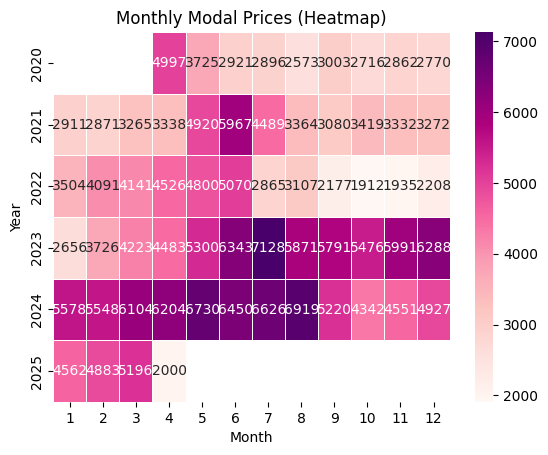

In [16]:
#HEATMAP


#creating a pivot for heatmap first bc df is not suitable as it is
pivot_table = df.groupby(['Year', 'Month'])['Modal_Price'].mean().unstack()



sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="RdPu", linewidths=0.5, linecolor='white')

plt.title('Monthly Modal Prices (Heatmap)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

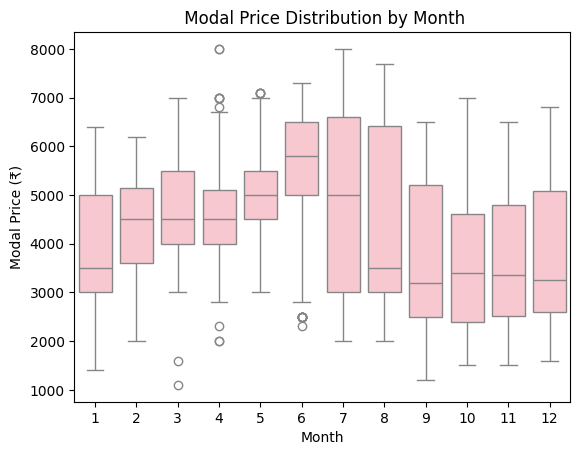

In [17]:
#BOX PLOT

sns.boxplot(data=df, x='Month', y='Modal_Price', color='#ffc0cb')

plt.title(" Modal Price Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Modal Price (₹)")
plt.show()


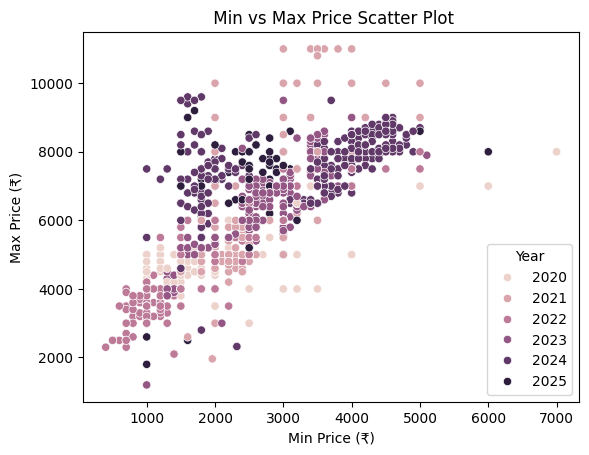

In [18]:
#SCATTER PLOT

sns.scatterplot(data=df, x='Min_Price', y='Max_Price', hue='Year')

plt.title(" Min vs Max Price Scatter Plot")
plt.xlabel("Min Price (₹)")
plt.ylabel("Max Price (₹)")
plt.show()


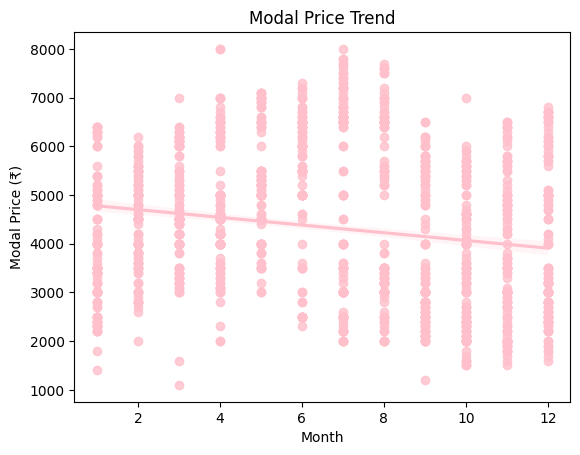

In [19]:
#TRENDLINE REGRESSION
sns.regplot(data=df, x='Month', y='Modal_Price', scatter=True,color='#ffc0cb' )

plt.title("Modal Price Trend")
plt.xlabel("Month")
plt.ylabel("Modal Price (₹)")
plt.show()

In [20]:
#OBJECTIVE 4
# EDA & Outlier Detection
# Conduct exploratory data analysis to summarize key statistics and detect correlations or outliers.


In [21]:
df.describe()

,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code,Year,Month
count,1466,1466.000000,1466.000000,1466.000000,1466.0,1466.000000,1466.000000
mean,2022-10-07 22:55:10.231923200,2548.854025,6160.586630,4332.824011,17.0,2022.258527,6.638472
min,2020-04-03 00:00:00,400.000000,1200.000000,1100.000000,17.0,2020.000000,1.000000
25%,2021-07-16 06:00:00,1800.000000,5000.000000,3000.000000,17.0,2021.000000,4.000000
50%,2022-10-07 12:00:00,2500.000000,6200.000000,4250.000000,17.0,2022.000000,7.000000
75%,2024-01-15 18:00:00,3200.000000,7375.000000,5500.000000,17.0,2024.000000,10.000000
max,2025-04-01 00:00:00,7000.000000,11000.000000,8000.000000,17.0,2025.000000,12.000000
std,NaN,1012.158129,1628.846929,1527.852295,0.0,1.496986,3.457039


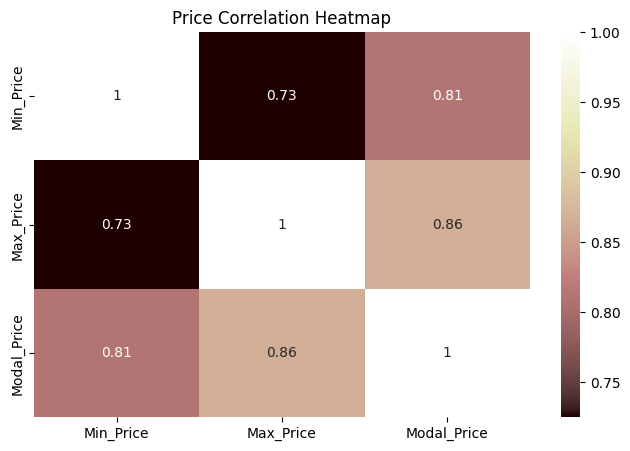

In [22]:
#CORELATION HEATMAP

plt.figure(figsize=(8, 5))
sns.heatmap(df[['Min_Price', 'Max_Price', 'Modal_Price']].corr(), annot=True, cmap='pink')

plt.title("Price Correlation Heatmap")
plt.show()


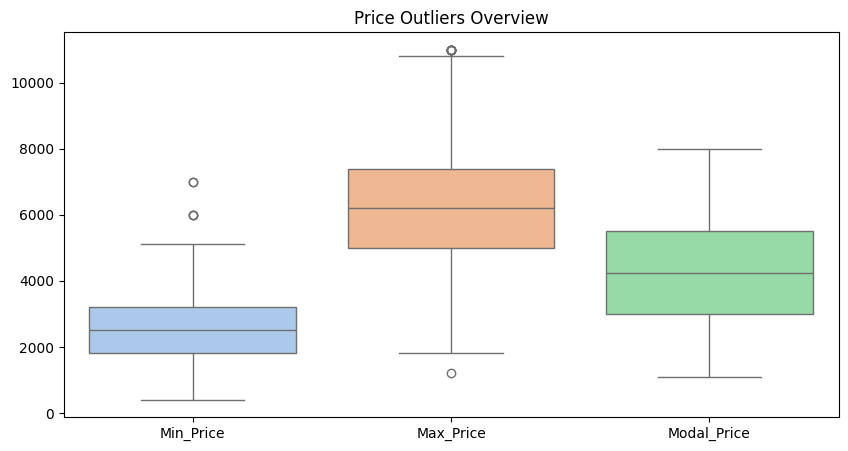

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Min_Price', 'Max_Price', 'Modal_Price']], palette='pastel')

plt.title("Price Outliers Overview")
plt.show()


In [24]:
# Calculate Q1 and Q3
Q1 = df['Modal_Price'].quantile(0.25)
Q3 = df['Modal_Price'].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers = df[(df['Modal_Price'] < Q1 - 1.5 * IQR) | (df['Modal_Price'] > Q3 + 1.5 * IQR)]

# Show how many outliers
print(f"Total outliers in Modal Price: {len(outliers)}")

outliers.head()

Total outliers in Modal Price: 0


,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code,Year,Month


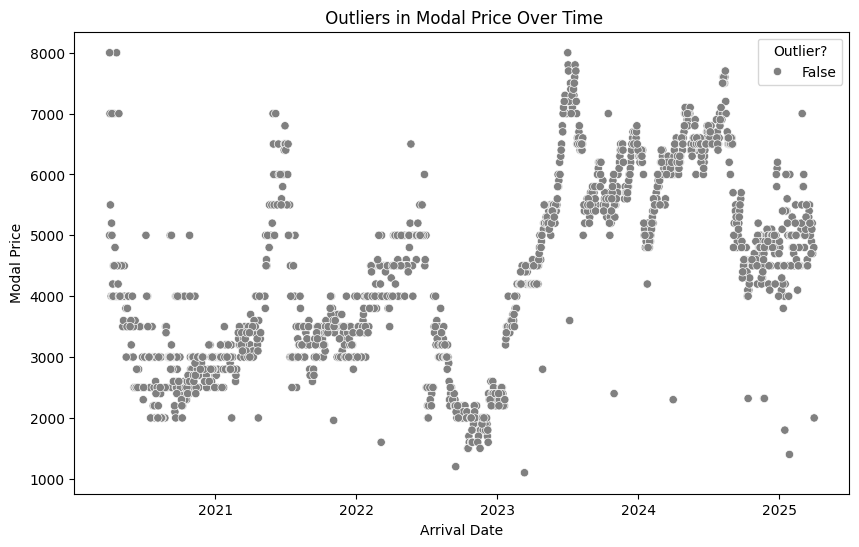

In [25]:
#outliers w scatterplot

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Arrival_Date', y='Modal_Price', hue=df['Modal_Price'] > Q3 + 1.5 * IQR, palette={True: 'red', False: 'grey'})

plt.title(" Outliers in Modal Price Over Time")
plt.xlabel("Arrival Date")
plt.ylabel("Modal Price")
plt.legend(title='Outlier?')
plt.show()

In [26]:
#OBJECTIVE 5
# Descriptive Statistics
# Apply statistical tests to analyze price variations across seasons and check data distribution patterns.


In [27]:
# Perform the Shapiro-Wilk test
stat, p = shapiro(df['Modal_Price'])

print(f"Test Statistic: {stat}")
print(f"P-value: {p}")

# Interpret the result
if p > 0.05:
    print(" Data looks normally distributed (fail to reject H0)")
else:
    print(" Data is not normally distributed (reject H0)")

Test Statistic: 0.9670921949705048
P-value: 9.332917831950132e-18
 Data is not normally distributed (reject H0)


In [28]:
#SINCE THE DATA IS NOT NORMALLY DISTRIBBUTED WE CANT PERFORM T-TESTS OR Z-TESTS
#performing them anyway for the sake of learning



# Convert to Month if not already
df['Month'] = df['Arrival_Date'].dt.month

# Filter prices for Jan and Feb
jan_prices = df[df['Month'] == 1]['Modal_Price']
feb_prices = df[df['Month'] == 2]['Modal_Price']

# Perform t-test
stat, p = ttest_ind(jan_prices, feb_prices, equal_var=False)
print(f"T-Test Statistic: {stat}")
print(f"P-value: {p}")
if p > 0.05:
    print(" No significant difference in prices (fail to reject H₀)")
else:
    print("Significant difference in prices (reject H₀)")




T-Test Statistic: -2.744033245254488
P-value: 0.006569311920768736
Significant difference in prices (reject H₀)


In [29]:
# Is average Modal_Price different from ₹500? Z TEST
z_stat, p_val = ztest(df['Modal_Price'], value=500)
print(f"Z-Test Statistic: {z_stat}")
print(f"P-value: {p_val}")
if p_val > 0.05:
    print(" Modal Price ≈ 500 (fail to reject H₀)")
else:
    print(" Modal Price ≠ 500 (reject H₀)")


Z-Test Statistic: 96.05157551972535
P-value: 0.0
 Modal Price ≠ 500 (reject H₀)


In [30]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Variety'], df['Grade'])

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared: {chi2}")
print(f"P-value: {p}")

if p > 0.05:
    print(" No relationship between Variety & Grade (fail to reject H₀)")
else:
    print("There is a relationship between Variety & Grade (reject H₀)")

Chi-Squared: 0.0
P-value: 1.0
 No relationship between Variety & Grade (fail to reject H₀)


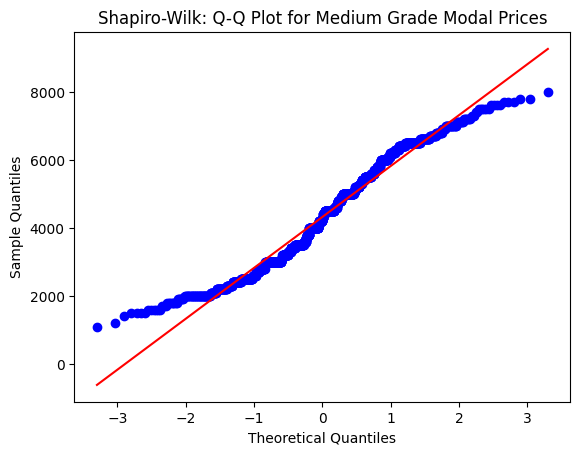

In [34]:
#SHAPIRO-WILK VISUALISATION

import scipy.stats as stats
import matplotlib.pyplot as plt

# Shapiro-Wilk on Medium Grade
medium = df[df['Grade'] == 'Medium']['Modal_Price']
stats.probplot(medium, dist="norm", plot=plt)
plt.title("Shapiro-Wilk: Q-Q Plot for Medium Grade Modal Prices")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

T-Statistic: -0.9739
P-Value: 0.3364


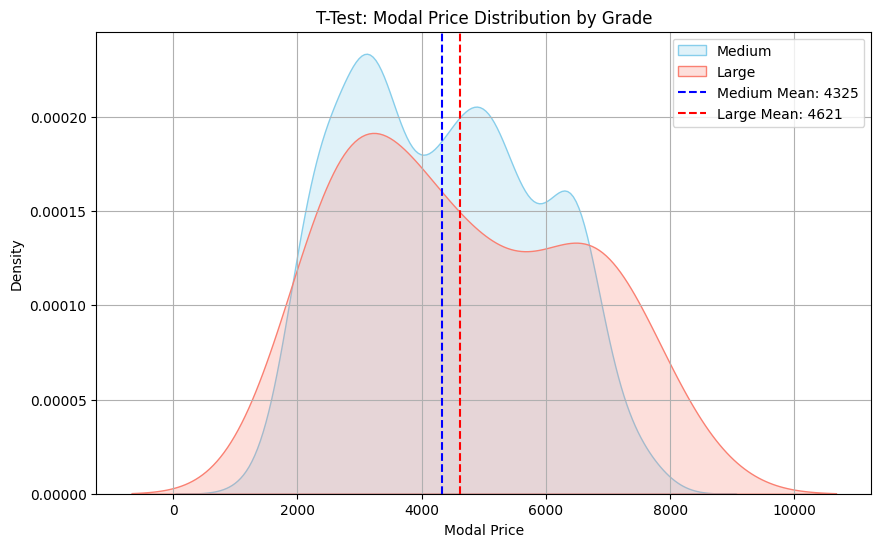

In [36]:
#T-TEST VISUALISATION


import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Extract modal prices by grade
medium = df[df['Grade'] == 'Medium']['Modal_Price']
large = df[df['Grade'] == 'Large']['Modal_Price']

# Perform Welch’s T-test (unequal variances)
t_stat, p_value = stats.ttest_ind(medium, large, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Updated KDE plot using 'fill=True'
plt.figure(figsize=(10, 6))
sns.kdeplot(medium, label='Medium', fill=True, color='skyblue')
sns.kdeplot(large, label='Large', fill=True, color='salmon')
plt.axvline(medium.mean(), color='blue', linestyle='--', label=f'Medium Mean: {medium.mean():.0f}')
plt.axvline(large.mean(), color='red', linestyle='--', label=f'Large Mean: {large.mean():.0f}')
plt.title("T-Test: Modal Price Distribution by Grade")
plt.xlabel("Modal Price")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


Z-Score: -16.8033
P-Value: 0.0000


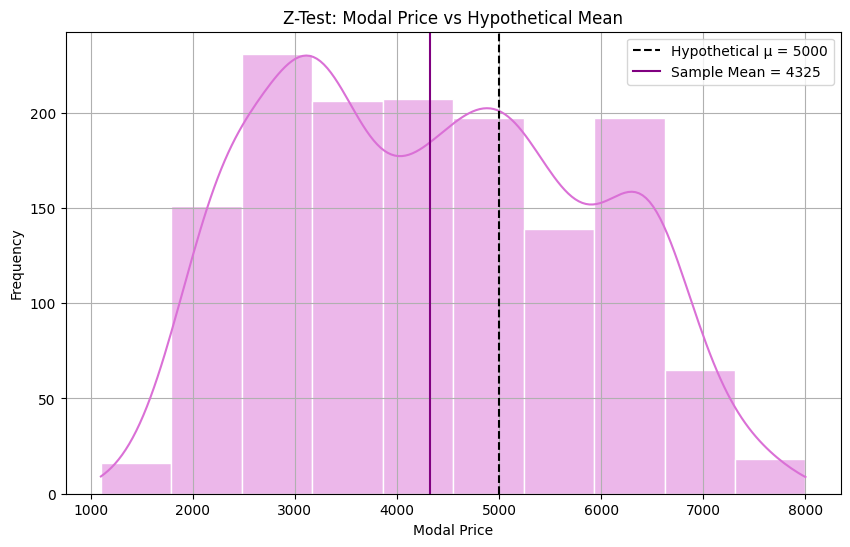

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

medium = df[df['Grade'] == 'Medium']['Modal_Price']

mu = 5000

sample_mean = np.mean(medium)
sample_std = np.std(medium, ddof=1)
n = len(medium)
z_score = (sample_mean - mu) / (sample_std / np.sqrt(n))

p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print(f"Z-Score: {z_score:.4f}")
print(f"P-Value: {p_value:.4f}")

plt.figure(figsize=(10, 6))
sns.histplot(medium, kde=True, color='orchid', bins=10, edgecolor='white')
plt.axvline(mu, color='black', linestyle='--', label=f'Hypothetical μ = {mu}')
plt.axvline(sample_mean, color='purple', linestyle='-', label=f'Sample Mean = {sample_mean:.0f}')
plt.title("Z-Test: Modal Price vs Hypothetical Mean")
plt.xlabel("Modal Price")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


Chi-Squared Test Results:
Chi2 Statistic: 3.7617
Degrees of Freedom: 6
P-Value: 0.7089


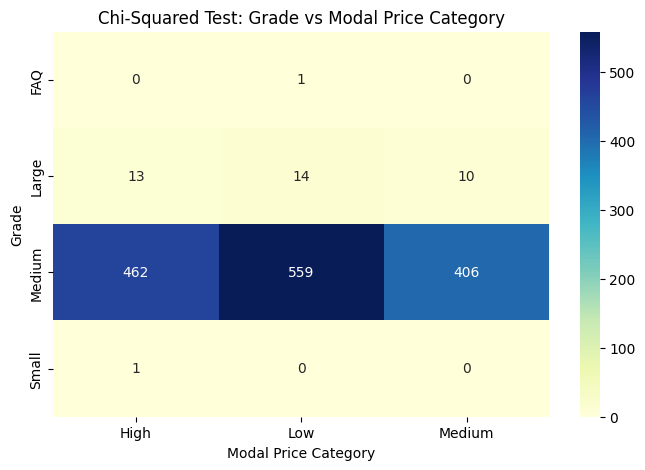

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


def categorize_price(price):
    if price <= 3500:
        return 'Low'
    elif price <= 5000:
        return 'Medium'
    else:
        return 'High'

df['Price_Category'] = df['Modal_Price'].apply(categorize_price)


contingency = pd.crosstab(df['Grade'], df['Price_Category'])

chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Squared Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4f}")


plt.figure(figsize=(8, 5))
sns.heatmap(contingency, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Chi-Squared Test: Grade vs Modal Price Category")
plt.ylabel("Grade")
plt.xlabel("Modal Price Category")
plt.show()
